In [34]:
import matplotlib.pyplot as plt
import numpy as np

import gpflow
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.optimize import curve_fit

In [8]:
model_data = pd.read_csv('/home/smmrrr/TEM_Analysis/TEM_Analysis/region_3_test_model_data_conif_vegc.csv')
unique_bins = sorted(model_data.stand_age_interval_min.unique())
bin_to_ordinal = {bin_val: idx for idx, bin_val in (enumerate(unique_bins))}
print(bin_to_ordinal)
model_data['ordinal_stand_age'] = model_data['stand_age_interval_min'].map(bin_to_ordinal)
model_data['ordinal_stand_age'].describe()
# model_data = model_data.loc[model_data['year']>=1900]

{0: 0, 5: 1, 10: 2, 15: 3, 20: 4, 25: 5, 30: 6, 35: 7, 40: 8, 45: 9, 50: 10, 55: 11, 60: 12, 65: 13, 70: 14, 75: 15, 80: 16, 85: 17, 90: 18, 95: 19, 100: 20, 125: 21, 150: 22}


count    287630.000000
mean          9.834551
std           7.873397
min           0.000000
25%           3.000000
50%           8.000000
75%          17.000000
max          22.000000
Name: ordinal_stand_age, dtype: float64

In [9]:
variables_to_compare = ['monthly_mean', 'tswrf_v11', 'tmp', 'precip', 'dtr', 'vpr', 'wind','co2','Ndep_Trendy']

base_comparison = model_data.loc[model_data['year'].between(1900,1950)].groupby(
    ['lon','lat','ordinal_stand_age'])[variables_to_compare].mean().reset_index()


model_data=model_data.merge(base_comparison, on = ['lon','lat','ordinal_stand_age'], suffixes = ('_ts', '_base'))
model_data=model_data.loc[model_data['monthly_mean_base']!=0]
# Iterate over the list of variables and create new columns in model_data for their ratios
for var in variables_to_compare:
    ts_column = f"{var}_ts"     # Time series data column name
    base_column = f"{var}_base" # Baseline data column name
    ratio_column = f"{var}_ratio" # Name for the new ratio column

    # Compute the ratio and create a new column in model_data
    if (var =='precip'):
        model_data[ratio_column] = model_data[ts_column] / model_data[base_column]
    else:
        model_data[ratio_column] = model_data[ts_column] - model_data[base_column]


In [10]:
model_data = model_data.loc[model_data['year']>=1950]
# model_data = model_data.loc[model_data['monthly_mean_ratio']<=3]

In [5]:
model_data.columns

Index(['lon', 'lat', 'year', 'stand_age_interval_min', 'silt_clay',
       'monthly_mean_ts', 'tswrf_v11_ts', 'tmp_ts', 'precip_ts', 'dtr_ts',
       'vpr_ts', 'wind_ts', 'Ndep_Trendy_ts', 'Nfer_crop', 'Nfer_pas', 'var',
       'Area', 'elev', 'region', 'co2_ts', 'ordinal_stand_age',
       'monthly_mean_base', 'tswrf_v11_base', 'tmp_base', 'precip_base',
       'dtr_base', 'vpr_base', 'wind_base', 'co2_base', 'Ndep_Trendy_base',
       'monthly_mean_ratio', 'tswrf_v11_ratio', 'tmp_ratio', 'precip_ratio',
       'dtr_ratio', 'vpr_ratio', 'wind_ratio', 'co2_ratio',
       'Ndep_Trendy_ratio'],
      dtype='object')

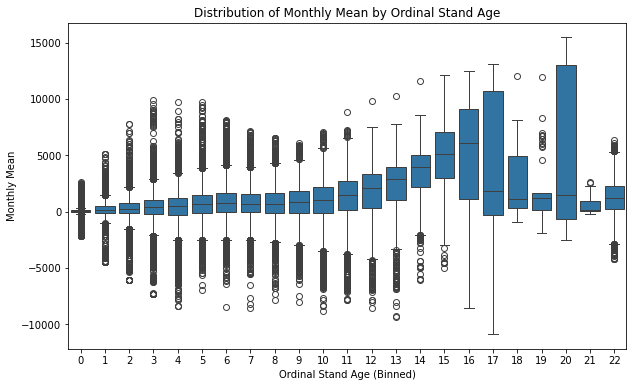

In [55]:

# Plotting a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ordinal_stand_age', y='monthly_mean_ratio', data=model_data)
plt.title('Distribution of Monthly Mean by Ordinal Stand Age')
plt.xlabel('Ordinal Stand Age (Binned)')
plt.ylabel('Monthly Mean')
plt.show()

In [77]:
# Define the features and target variable
# X = np.array(model_data[['tswrf_v11_ratio', 'tmp_ratio', 'precip_ratio',
#        'dtr_ratio', 'vpr_ratio', 'wind_ratio', 'co2_ratio',
#        'Ndep_Trendy_ratio']])
X = np.array(model_data[['ordinal_stand_age', 'tmp_ratio']],dtype=float)
Y = np.array(model_data[['monthly_mean_ratio']],dtype=float)

# Split the data into training and testing sets (80% train, 20% test)
# randomness can be controlled with a defined `random_state`
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Y = np.array(
#     model_data.loc[:, 'monthly_mean_ratio']
# )
# X = np.array(
#      # model_data.loc[model_data['year']>=2020,['ordinal_stand_age']]
#      model_data.loc[:,['ordinal_stand_age','tmp_ratio']]
# )
# Y = Y.reshape(len(Y),1)

array([2.43610743, 1.15502881, 0.41720371])

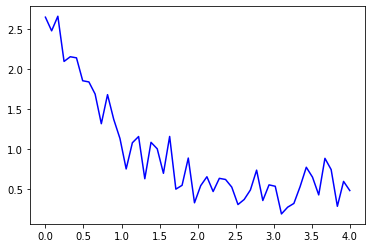

In [49]:
xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)

rng = np.random.default_rng()

y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)

popt

In [50]:
ydata

array([2.65417105, 2.48283816, 2.66590476, 2.09823048, 2.15727845,
       2.14338183, 1.85583192, 1.84083784, 1.6887174 , 1.31614692,
       1.68100937, 1.36989369, 1.13054156, 0.74807253, 1.07703007,
       1.15501308, 0.62511517, 1.08217223, 1.00098098, 0.69309264,
       1.15605353, 0.49426897, 0.54240509, 0.8846851 , 0.32284194,
       0.53830203, 0.65006091, 0.46431859, 0.62992496, 0.6155971 ,
       0.51981825, 0.30075856, 0.36449258, 0.4839022 , 0.73292277,
       0.35151896, 0.54803427, 0.53033641, 0.18314484, 0.26763739,
       0.31479893, 0.5257112 , 0.76914319, 0.644677  , 0.4218743 ,
       0.88123597, 0.73994036, 0.27870367, 0.59152344, 0.47661871])

In [47]:
X_test.dtype

dtype('float64')

In [52]:
Y_test.flatten()

array([ -63.799     , -746.61039216,  567.6155    , ..., -164.49215686,
       1207.31803922, 2601.16431373])

In [68]:
def func(x, a, b, c):
    return a * np.sin(-b * x) + c

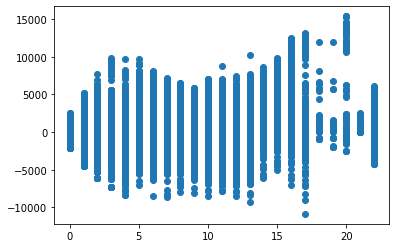

In [74]:
plt.scatter(X_train.flatten(), Y_train.flatten())

In [81]:
X_train[:,0].shape

(78124,)

In [82]:
popt, pcov = curve_fit(func, X_train[:,0].flatten(), Y_train.flatten())

In [83]:
popt

array([1229.19694656,   19.14426228, 1380.35540356])

In [66]:
xdata

array([0.        , 0.08163265, 0.16326531, 0.24489796, 0.32653061,
       0.40816327, 0.48979592, 0.57142857, 0.65306122, 0.73469388,
       0.81632653, 0.89795918, 0.97959184, 1.06122449, 1.14285714,
       1.2244898 , 1.30612245, 1.3877551 , 1.46938776, 1.55102041,
       1.63265306, 1.71428571, 1.79591837, 1.87755102, 1.95918367,
       2.04081633, 2.12244898, 2.20408163, 2.28571429, 2.36734694,
       2.44897959, 2.53061224, 2.6122449 , 2.69387755, 2.7755102 ,
       2.85714286, 2.93877551, 3.02040816, 3.10204082, 3.18367347,
       3.26530612, 3.34693878, 3.42857143, 3.51020408, 3.59183673,
       3.67346939, 3.75510204, 3.83673469, 3.91836735, 4.        ])

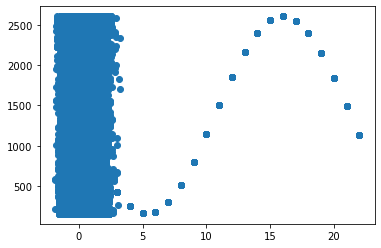

In [84]:
plt.scatter(X_train, func(X_train, *popt),

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [90]:
def func(xdata, a, b, c, d, e):
    x, z = xdata
    return a * np.sin(-b * x) + d * np.exp(e + z) + c


In [97]:
# initial_guess = [0, 0, 0, 0, 0]
xdata = np.vstack((X_train[:,0].flatten(), X_train[:,1].flatten()))
popt, pcov = curve_fit(func, xdata, Y_train.flatten())


In [98]:
popt

array([ 96.15884512,   1.42263214, 812.58755658,  16.27016874,
         1.06782068])

In [99]:
tt = func(xdata, *popt)

array([836.01781619, 887.01490476, 905.69255412, ..., 914.36018553,
       848.61090913, 892.50481655])

In [96]:
Y_train.flatten()

array([-1157.88692308,  1561.84196078,  1625.73117647, ...,
       -1280.96745098,   303.2127451 ,  2514.032     ])

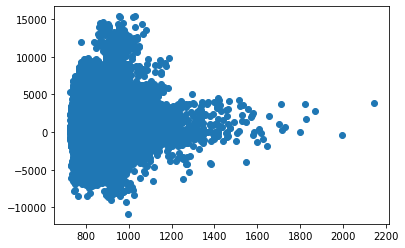

In [100]:
plt.scatter(func(xdata, *popt), Y_train)